##                                                         Fire Weather Index Prediction Project
## Milestone1
###  Module 1: Data Collection:


  

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math


print("all libraries working")

all libraries working


#### loaded the dataset into pandas Dataframe

In [2]:
#loading the dataset
import pandas as pd
df = pd.read_csv("fwi.xlsx.csv")
print("Dataset loaded") 


Dataset loaded


In [3]:
df.head()



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bejaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Bejaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bejaia


#### checked the datatype for each feature

In [4]:
print("Data Type of Each Column:")
print(df.dtypes)

Data Type of Each Column:
day              int64
month            int64
year             int64
Temperature      int64
 RH              int64
 Ws              int64
Rain           float64
FFMC           float64
DMC            float64
DC              object
ISI            float64
BUI            float64
FWI             object
Classes         object
Region          object
dtype: object


In [6]:
df.tail()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [7]:
print(df.shape)
print(df.columns)

(244, 15)
Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')


#### checking for duplicate rows in dataset

In [9]:
print("\nChecking for Duplicate Rows:")
print(df.duplicated().sum())
df=df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)


Checking for Duplicate Rows:
0
Shape after dropping duplicates: (244, 15)


#### Basic information about the dataset

In [10]:
print("\n information about the dataset:")
print(df.info())


 information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB
None


#### Statistical summary of dataset

In [11]:
#basic statistical summary of dataset
print("\n Statistical summary of the dataset:")
df.describe()


 Statistical summary of the dataset:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


 ## Module2:Data Exploration and Data preprocessing:

#### Cleaning column names


In [12]:
df.columns = (
    df.columns
        .str.strip()          # remove leading/trailing spaces
        .str.replace(" ", "_")# replace spaces with underscores
        .str.replace("-", "_")# replace hyphens
        .str.replace("/", "_")# replace slashes
        .str.lower()          # convert to lowercase
)
print("Cleaned column names:")
print(df.columns)

Cleaned column names:
Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')


In [13]:
df['dc'] = pd.to_numeric(df['dc'], errors='coerce')
df['fwi'] = pd.to_numeric(df['fwi'], errors='coerce')
print("\n Converted 'dc' and 'fwi' to numeric types.")
print(df[['dc','fwi']].dtypes)



 Converted 'dc' and 'fwi' to numeric types.
dc     float64
fwi    float64
dtype: object


#### Checking for missing values and handled

In [15]:
print("\nChecking for Missing Values:")
print(df.isnull().sum())

rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with missing values: \n",rows_with_missing)

print("\nTotal number of rows with missing values:")
print(len(rows_with_missing))





Checking for Missing Values:
day            0
month          0
year           0
temperature    0
rh             0
ws             0
rain           0
ffmc           0
dmc            0
dc             1
isi            0
bui            0
fwi            1
classes        1
region         0
dtype: int64
Rows with missing values: 
      day  month  year  temperature  rh  ws  rain  ffmc   dmc  dc   isi   bui  \
165   14      7  2012           37  37  18   0.2  88.9  12.9 NaN  12.5  10.4   

     fwi classes          region  
165  NaN     NaN  Sidi-Bel Abbes  

Total number of rows with missing values:
1


In [16]:
# Dropping rows with missing values
before = df.shape[0]
df = df.dropna()
after = df.shape[0]

print("Rows before dropping:", before)
print("Rows after dropping:", after)
print("Rows removed:", before - after)


Rows before dropping: 244
Rows after dropping: 243
Rows removed: 1


#### Outlier Detection Using Boxplots


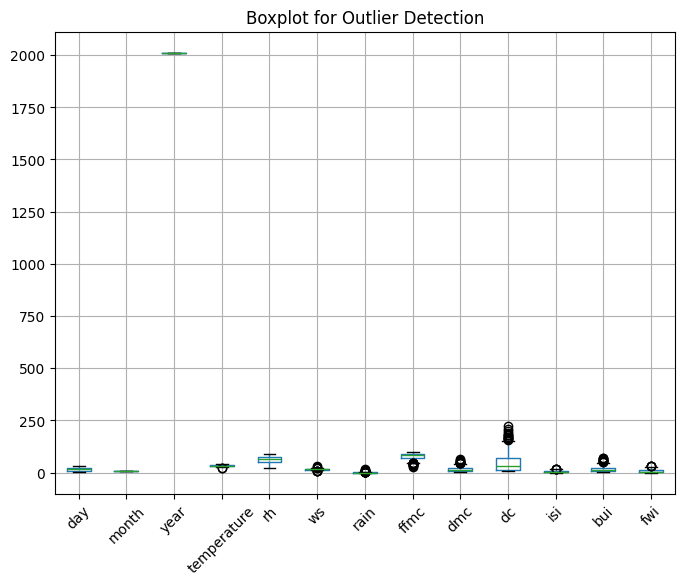

In [19]:
#Boxplot for visual outlier detection
plt.figure(figsize=(8, 6))
df.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

#### Distribution Analysis of Numerical Features



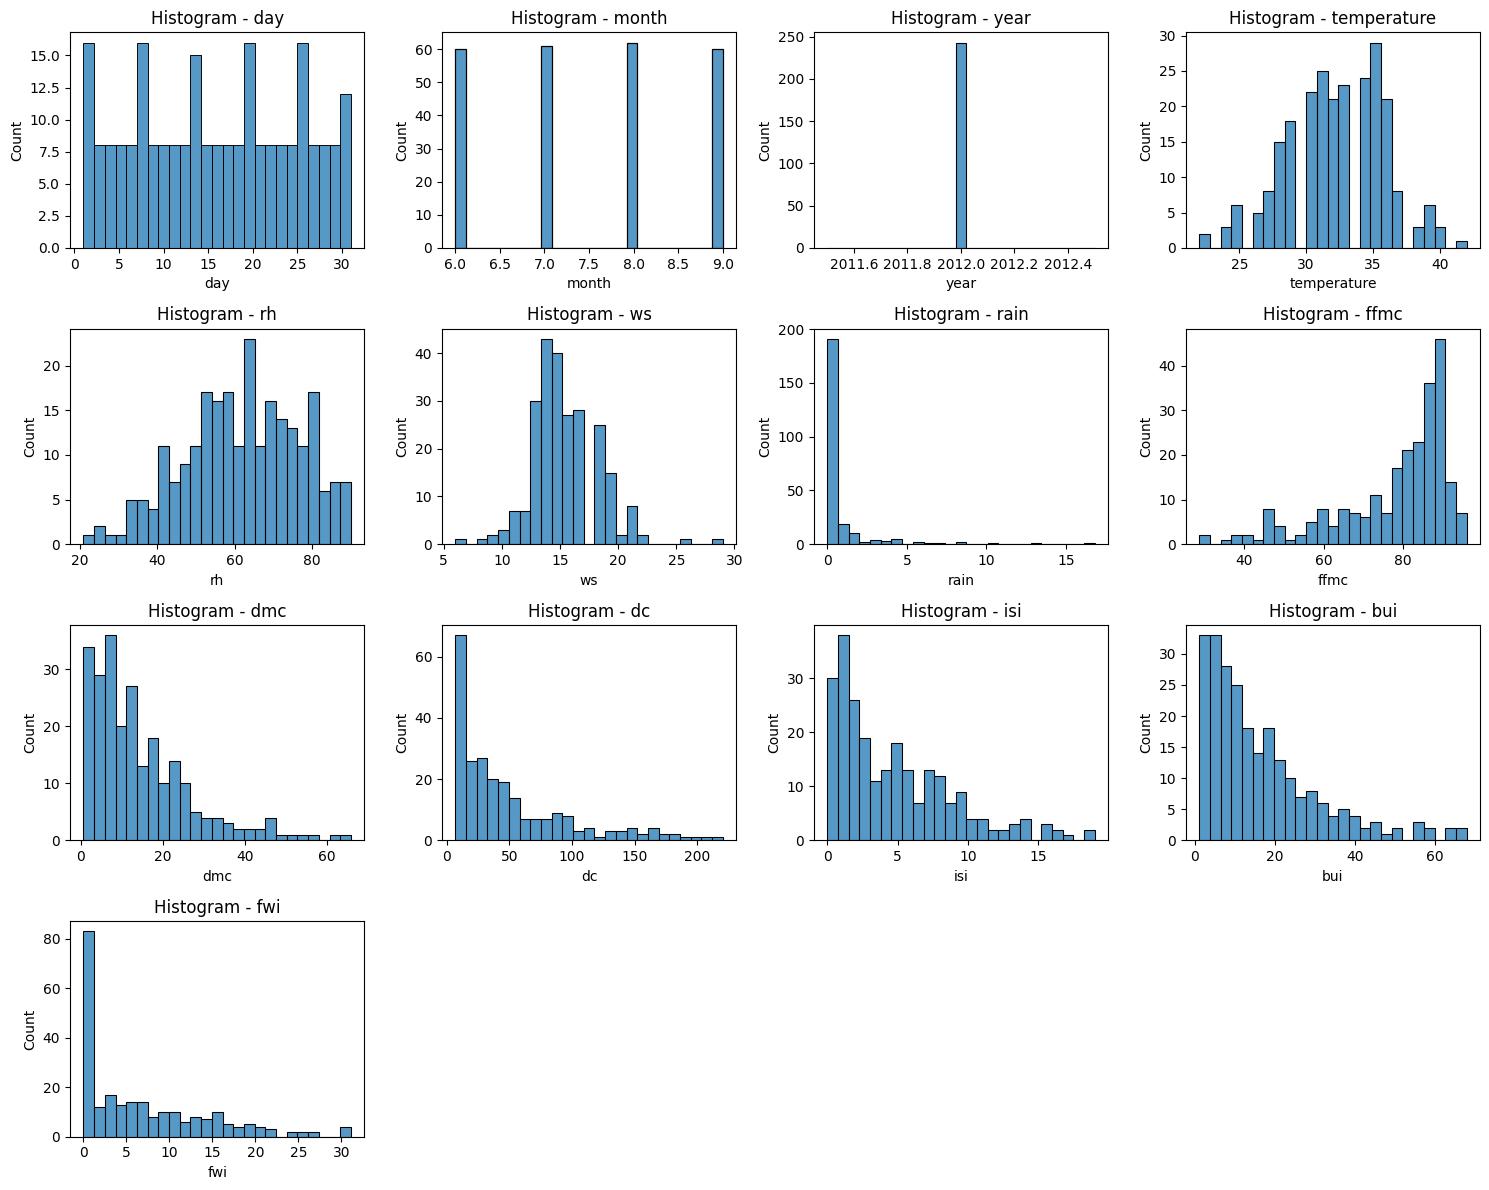

In [22]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(df[col], bins=25)  
    plt.title(f"Histogram - {col}")
    plt.tight_layout()

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16632\1093440116.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True)


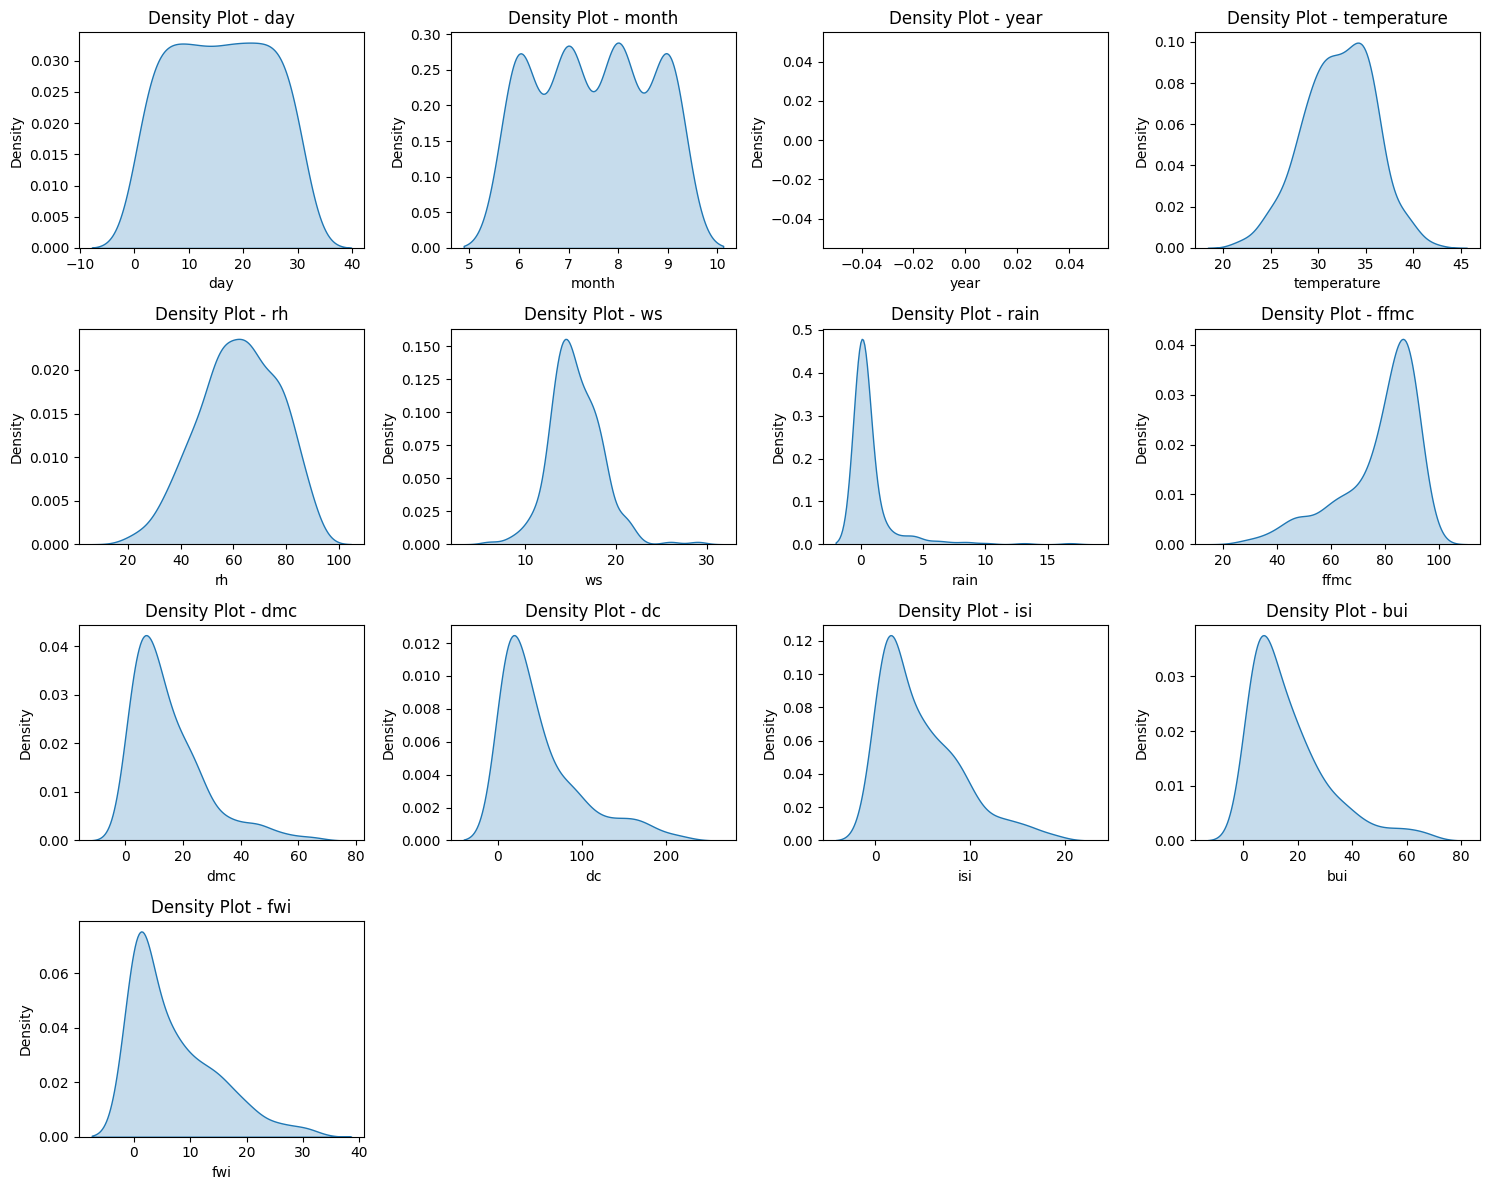

In [23]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.kdeplot(df[col], fill=True)  
    plt.title(f"Density Plot - {col}")
    plt.tight_layout()

plt.show()

#### Correlation heatmap to visualize correlations among all numerical variables

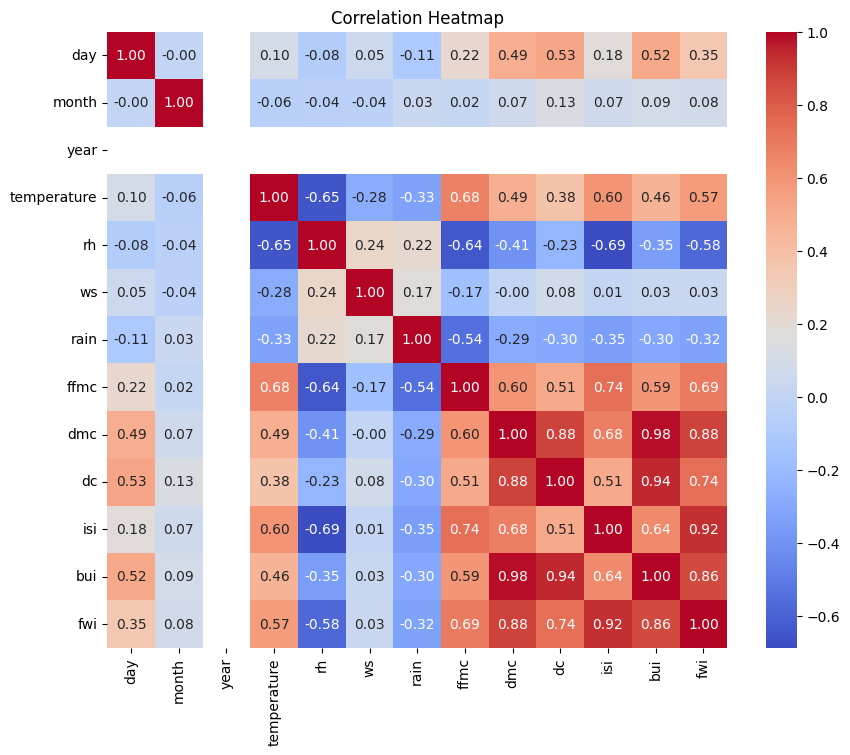

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Pair Plots for Visualizing Feature Relationships


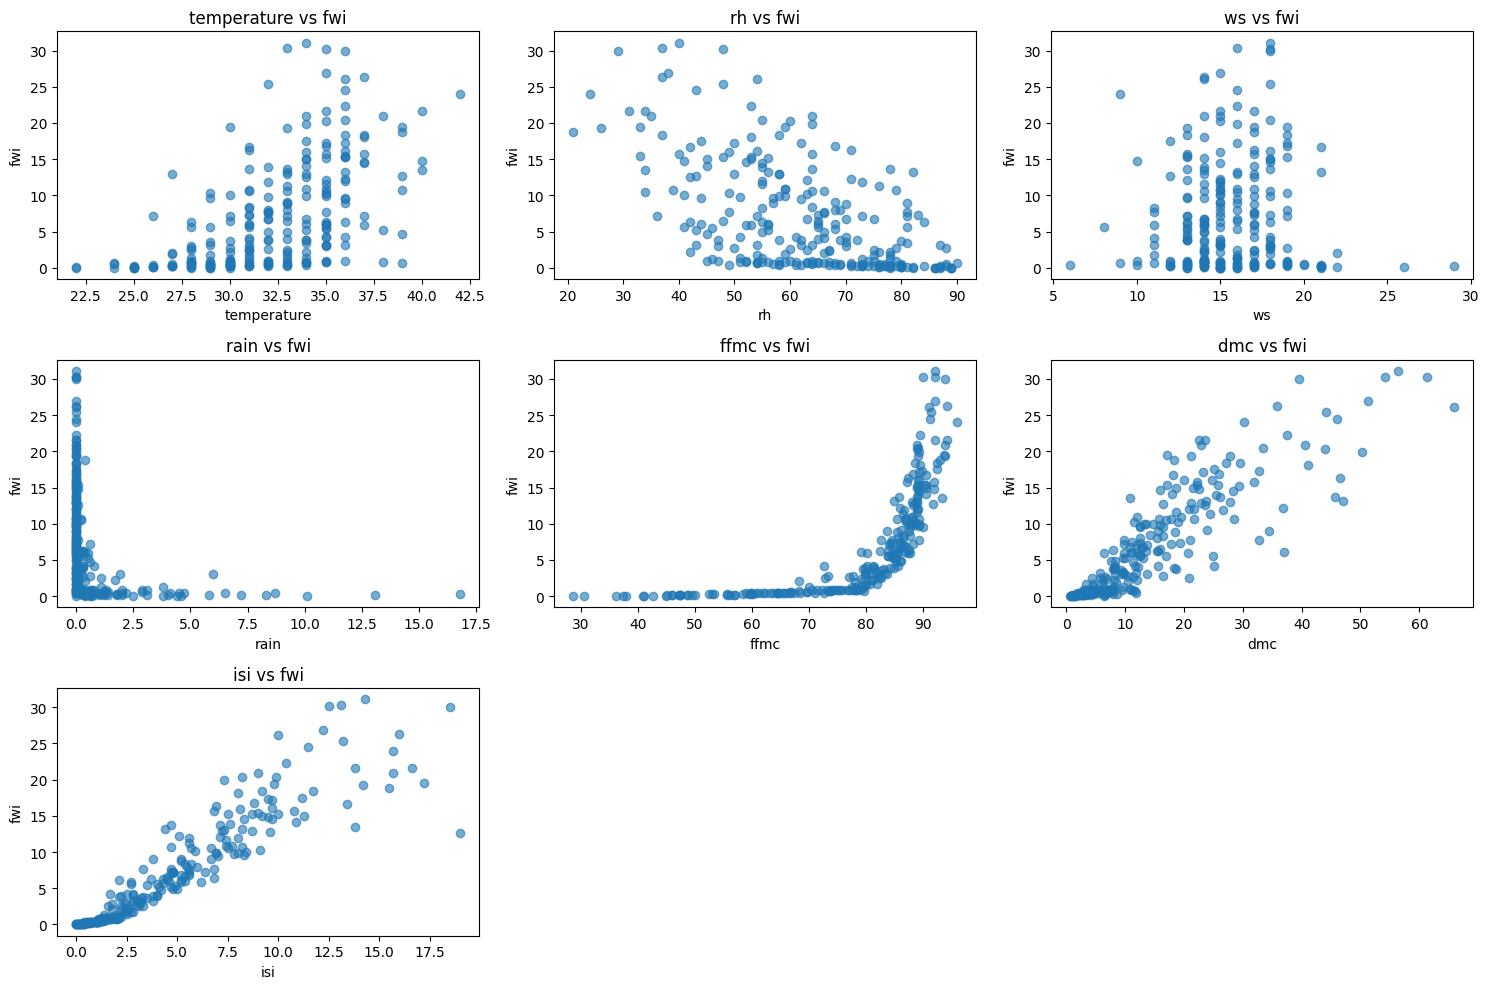

In [25]:
# Simple pair plot for selected features
 
features = ['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'isi']

plt.figure(figsize=(15, 10))

for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[col], df['fwi'], alpha=0.6)
    plt.title(f"{col} vs fwi")
    plt.xlabel(col)
    plt.ylabel("fwi")

plt.tight_layout()
plt.show()


In [26]:
# Label encoding the region column

# I created a LabelEncoder object
le_region = LabelEncoder()

# I applied it on the region column to convert the text into numbers
df['region_encoded'] = le_region.fit_transform(df['region'])

# Just checking the first few encoded values
print(df[['region', 'region_encoded']].head())

# This shows how each region was converted into a number
region_mapping = dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))
print("Region mapping:", region_mapping)

# Changing the encoded values to category type (optional)
df['region_encoded'] = df['region_encoded'].astype('category')

# Checking the data types after encoding
print(df[['region', 'region_encoded']].dtypes)



   region  region_encoded
0  Bejaia               0
1  Bejaia               0
2  Bejaia               0
3  Bejaia               0
4  Bejaia               0
Region mapping: {'Bejaia': np.int64(0), 'Sidi-Bel Abbes': np.int64(1)}
region              object
region_encoded    category
dtype: object


In [27]:
df = df.drop(columns=['classes'])

print("Updated columns after dropping 'classes':")
print(df.columns)


Updated columns after dropping 'classes':
Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'region', 'region_encoded'],
      dtype='object')


#### Final checking 

In [28]:
print("Columns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nDuplicate rows:", df.duplicated().sum())
print("\nDescribe:\n", df.describe())


Columns: Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'region', 'region_encoded'],
      dtype='object')

Missing values:
 day               0
month             0
year              0
temperature       0
rh                0
ws                0
rain              0
ffmc              0
dmc               0
dc                0
isi               0
bui               0
fwi               0
region            0
region_encoded    0
dtype: int64

Data types:
 day                  int64
month                int64
year                 int64
temperature          int64
rh                   int64
ws                   int64
rain               float64
ffmc               float64
dmc                float64
dc                 float64
isi                float64
bui                float64
fwi                float64
region              object
region_encoded    category
dtype: object

Duplicate rows: 0

Describe:
               day       month 

#### Saved the cleaned dataset for further analysis

In [30]:
df.to_csv("cleaned_FWI_dataset.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


## Summary
In Module 2,
 I focused on preparing the dataset for modeling by performing several data cleaning and analysis steps. I started by cleaning the column names to remove spaces, convert them to lowercase, and make them easier to work with. After loading the dataset, I checked for missing values across all rows and columns, and confirmed that there were no null values present.

Next, I converted important numeric columns like DC and FWI into float type to ensure they were ready for mathematical operations. The region column was then label-encoded so it could be used in machine learning models. Since the classes column was not required for the regression task, I removed it from the dataset.

After cleaning, I generated boxplots to visually detect outliers in the numeric features and used scatterplots to study the relationship between each feature and the FWI value. I also created a correlation heatmap to understand how different features are related to one another.

Finally, I saved the fully cleaned dataset as cleaned_FWI_dataset.csv, which is now ready for further processing in Module 3.